##               **MOVIE CORRELATION AND VISUALIZATION OF DATA**

---






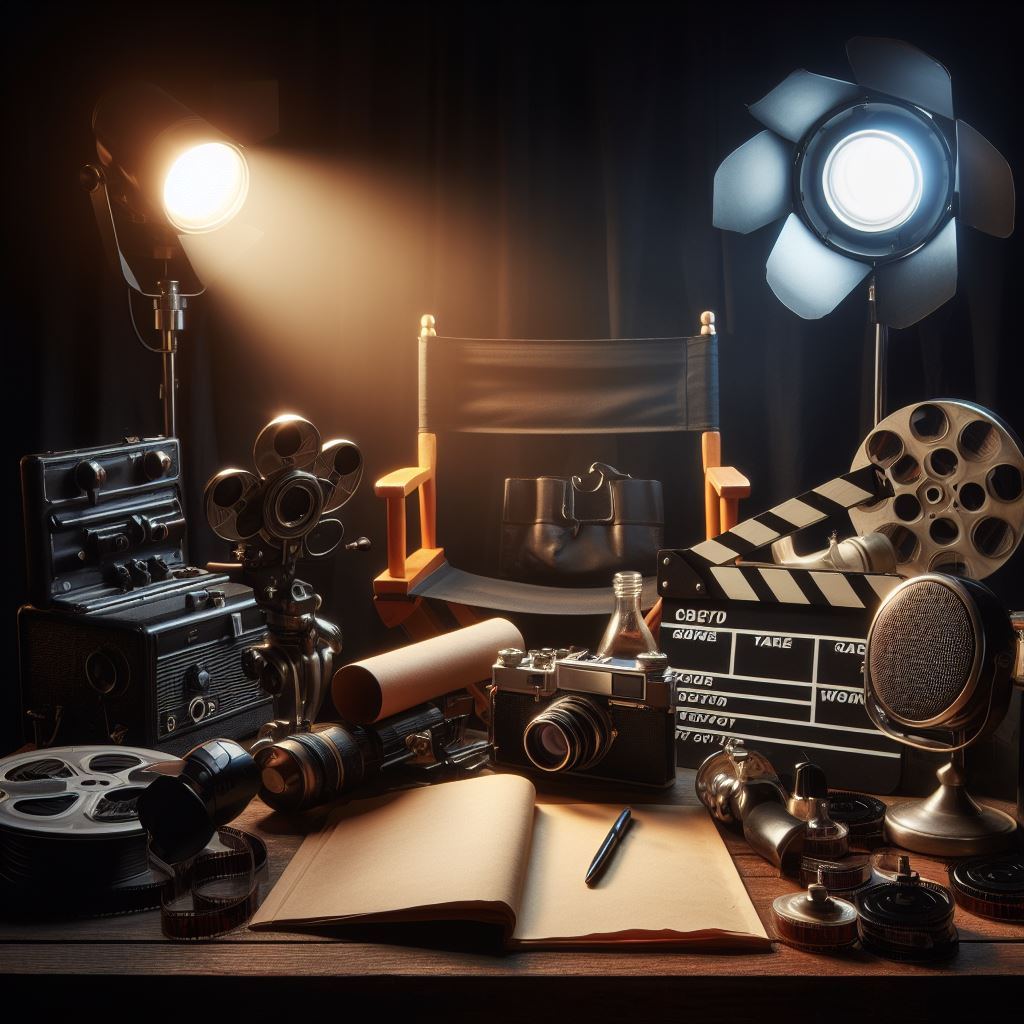

**Contents of the blog:**

* Introduction
* Initiation, which further includes the following steps:
  * Importing libraries
  * Loading data
  * Cleaning data
  * Correlation within data
  * Visualization of data
* Conclusion

**INTRODUCTION:**

In this blog, I will be analyzing a set of data obtained from Kaggle. This blog post delves into the comprehensive analysis of a movie dataset, encompassing various steps from data initiation, cleansing, and correlation examination to insightful visualization. Each section brings valuable insights into the film industry’s dynamics, exploring relationships between different movie attributes and their impact on performance. I aim to uncover trends, patterns, and potential correlations within the dataset through this analysis.

**INITIATION:**

###**1. IMPORTING LIBRARIES**

Here, in the first step, I'll be importing all the nescessary libraries:

* numpy is imported and aliased as np.

* pandas is imported and aliased as pd.

* matplotlib is imported.

* seaborn is imported.

* copy is imported.

In [497]:
# Importing the Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import copy
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

###**2. LOADING DATA**

The code i've written here, loads and then reads a CSV file named movie_data_set.csv into a pandas DataFrame object named df. The df.head() function returns the first 5 rows of the DataFrame.

In [498]:
# Read in the data
df = pd.read_csv('movies.csv')
df.head()
# df.info()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


###**3. CLEANING DATA**

Now the code that I've written below will help in cleaning the data. It will return a pandas Series object that contains the sum of missing values for each column in the DataFrame. The name of each column is used as the index of the Series object.

In [499]:
# Checking missing values
missing = df.isnull().sum()
print(missing)

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64


Now the code will fill all the NaN values in a pandas DataFrame with the next values and check if there are any missing values.

In [500]:
# filling all the NaN values in df with the next values...
df1 = df.fillna(method = 'ffill')
df1.isna()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7664,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7665,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7666,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Here, the code will return a pandas Series object that contains the data type of each column in the DataFrame. The name of each column is used as the index of the Series object.

In [501]:
# Datatypes of our columns
df1.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

Now, I've used this code below to change the data types of the specified columns in the DataFrame df to the new data types specified.

In [502]:
# Changing data types of the columns...
def new_col(df, col_name , datatype = 'int64'):
    df[col_name] = df[col_name].astype(datatype)
    return df[col_name]

df1['budget'] = new_col(df1 , 'budget')
df1['gross'] = new_col(df1 , 'gross')
df1['runtime'] = new_col(df1 , 'runtime')
df1['votes'] = new_col(df1 , 'votes')

Now, here the code will sort the data in the DataFrame df1 by the column gross in descending order. The sort_values() method is used to sort the data, and the in place parameter is set to False to create a new DataFrame with the sorted data. The reset_index() method is then used to reset the index of the DataFrame after sorting.

In [503]:
# ordering data by gross..
df1 = df1.sort_values(by = ['gross'], inplace = False , ascending = False)
df1 = df1.reset_index(drop=True)

The code that I've written here will now drop any duplicate rows in the company column of the DataFrame df1 and sort the resulting unique values in descending order. The drop_duplicates() method is used to remove the duplicate rows, and the sort_values() method is used to sort the unique values in descending order. The ascending parameter is set to False to sort the values in descending order.

In [504]:
# Drop any duplicates..
df1['company'].drop_duplicates().sort_values(ascending = False)

2129                                thefyzz
5212                            micro_scope
7054               iDeal Partners Film Fund
4813                               i5 Films
3941                             i am OTHER
                       ...                 
6886                        10 West Studios
6707                     1+2 Seisaku Iinkai
7623                        .406 Production
815     "Weathering With You" Film Partners
2576        "DIA" Productions GmbH & Co. KG
Name: company, Length: 2385, dtype: object

Now I have written the code df1.head() that returns the first 5 rows of the DataFrame df1. The head() method in pandas is used to return the first few rows of a data frame.

In [505]:
df1.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162
1,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181
2,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194
3,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138
4,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149


###**4. CORRELATION WITHIN THE DATA**

Now, the next code that I've written below defines the correlation within the data where df1.Corr () computes the pairwise correlation of all columns in the DataFrame df1 using the Pearson correlation coefficient method. The resulting data frame contains the correlation coefficients between all pairs of columns in df1. Now I have written the code df1.head() that returns the first 5 rows of the DataFrame df1. The head() method in pandas is used to return the first few rows of a data frame.

In [506]:
# Let's start looking at correlation
df1.corr()

<ipython-input-506-dfab8d47c67a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()


,year,score,votes,budget,gross,runtime
year,1.000000,0.098098,0.222427,0.334314,0.261550,0.120694
score,0.098098,1.000000,0.409064,0.080708,0.186264,0.399116
votes,0.222427,0.409064,1.000000,0.449422,0.632341,0.309140
budget,0.334314,0.080708,0.449422,1.000000,0.701819,0.263424
gross,0.261550,0.186264,0.632341,0.701819,1.000000,0.245443
runtime,0.120694,0.399116,0.309140,0.263424,0.245443,1.000000


Now I am using the corr() method in pandas to calculate the correlation matrix between all numeric columns in a data frame. By setting the numeric_only parameter to True, I'll ensure that only numeric columns are included in the calculation. The method parameter is set to Pearson, which is the default method for calculating the correlation coefficient. The resulting correlation matrix will have a value of 1.0 along the diagonal, as each column is perfectly correlated with itself. The off-diagonal values represent the correlation between each pair of columns.

In [507]:
# Correlation Matrix between all numeric columns
df1.corr(method ='pearson',numeric_only = True)

,year,score,votes,budget,gross,runtime
year,1.000000,0.098098,0.222427,0.334314,0.261550,0.120694
score,0.098098,1.000000,0.409064,0.080708,0.186264,0.399116
votes,0.222427,0.409064,1.000000,0.449422,0.632341,0.309140
budget,0.334314,0.080708,0.449422,1.000000,0.701819,0.263424
gross,0.261550,0.186264,0.632341,0.701819,1.000000,0.245443
runtime,0.120694,0.399116,0.309140,0.263424,0.245443,1.000000


In the code below, the method parameter is set to Kendall, which calculates the Kendall Tau correlation coefficient. The resulting correlation matrix will have a value of 1.0 along the diagonal, as each column is perfectly correlated with itself. The off-diagonal values represent the correlation between each pair of columns.

In [508]:
df1.corr(method ='kendall',numeric_only = True)

,year,score,votes,budget,gross,runtime
year,1.000000,0.067724,0.330410,0.239054,0.206176,0.097144
score,0.067724,1.000000,0.299756,0.023015,0.088740,0.283102
votes,0.330410,0.299756,1.000000,0.359133,0.549760,0.198226
budget,0.239054,0.023015,0.359133,1.000000,0.423210,0.194368
gross,0.206176,0.088740,0.549760,0.423210,1.000000,0.173083
runtime,0.097144,0.283102,0.198226,0.194368,0.173083,1.000000


The code below is creating a correlation matrix of numeric features in a DataFrame **df1** and visualizing it using a heatmap.

<ipython-input-509-aef2c80208f6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix= df1.corr(method = 'pearson')


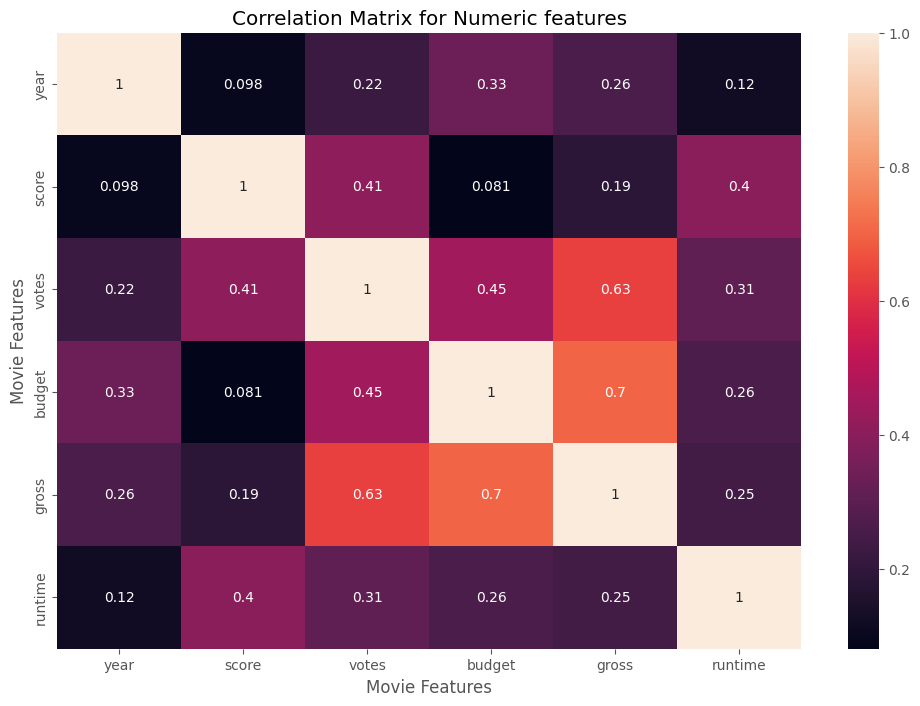

In [509]:
# There is a high correlation b/w budget and gross
correlation_matrix= df1.corr(method = 'pearson')
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation Matrix for Numeric features')
plt.xlabel("Movie Features")
plt.ylabel('Movie Features')
plt.show()


The code below is converting categorical data into a numeric format, it begins by creating a deep copy of **df1** and storing it in **df1_numerized**. If a column’s data type is ‘object’, indicating it contains categorical data, the code converts that column to a ‘category’ data type.  Following this, the code replaces each category in the column with a unique integer code, effectively transforming the categorical data into a numeric format.

In [510]:
# we're gonna assign a number to the corresponding company name. But it's better to convert all into numeric at the same time...
df1_numerized = copy.deepcopy(df1)
for col_name in df1_numerized.columns:
    if df1_numerized[col_name].dtype == 'object':
       df1_numerized[col_name] =  df1_numerized[col_name].astype('category')
       df1_numerized[col_name] = df1_numerized[col_name].cat.codes

df1_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,533,5,0,2009,696,7.8,1100000,1155,1778,2334,55,237000000,2847246203,2253,162
1,535,5,0,2019,183,8.4,903000,162,743,2241,55,356000000,2797501328,1606,181
2,6896,5,6,1997,704,7.8,1100000,1155,1778,1595,55,200000000,2201647264,2253,194
3,5144,5,0,2015,698,7.8,876000,1125,2550,524,55,245000000,2069521700,1540,138
4,536,5,0,2018,192,8.4,897000,162,743,2241,55,321000000,2048359754,1606,149


In [511]:
# ordering data by gross..
df = df.fillna(method = 'ffill')
df = df.sort_values(by = ['gross'], inplace = False , ascending = False)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0


The code below is generating a correlation matrix for all the numeric features in the DataFrame **df1_numerized** and visualizing it using a heatmap.

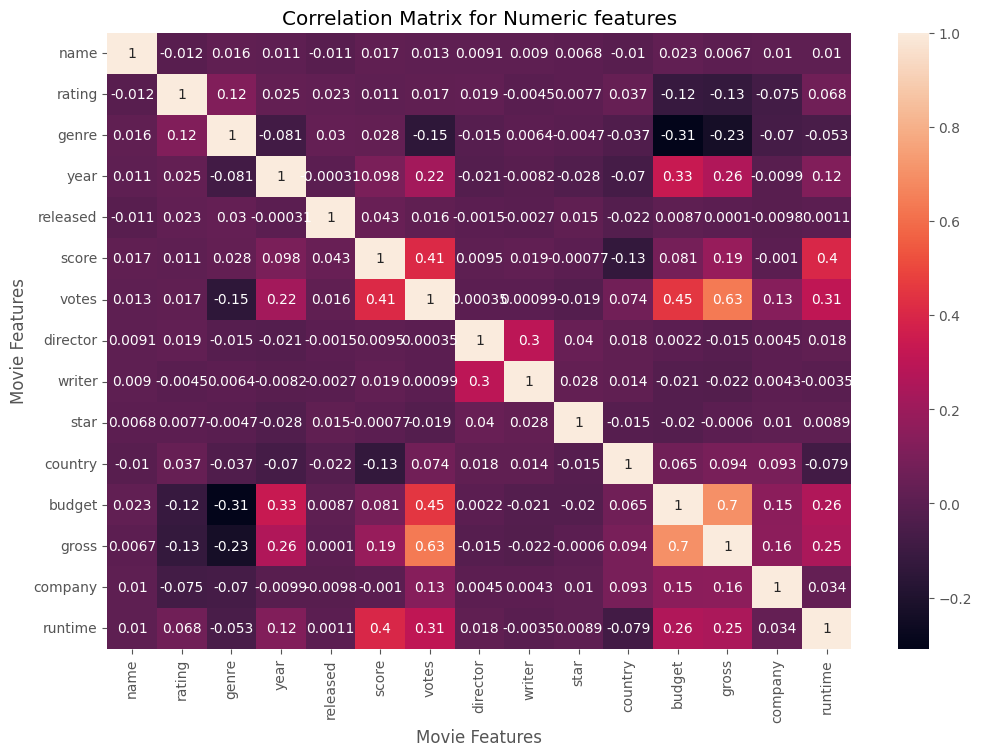

In [512]:
# now we can find the correlation between all the columns as well since we have assigned a numeric value to all the object dtype columns....
correlation_matrix= df1_numerized.corr(method = 'pearson')
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation Matrix for Numeric features')
plt.xlabel("Movie Features")
plt.ylabel('Movie Features')
plt.show()

**ANALYSIS NO. 1**

This Scatter plot represents the relationship between the film budget vs gross earnings of a movie, where the trend shows that the lower the movie budget, the lesser the gross earnings at the box office. The plot is dense, in the range (0.0,0.0) - (0.75-0.25) which indicates that most movies did not perform well at the box office. This plot helps visualize the correlation between budget and financial success in the movie industry. In the code below, the method parameter is set to Kendall, which calculates the Kendall Tau correlation coefficient. The resulting correlation matrix will have a value of 1.0 along the diagonal, as each column is perfectly correlated with itself. The off-diagonal values represent the correlation between each pair of columns.

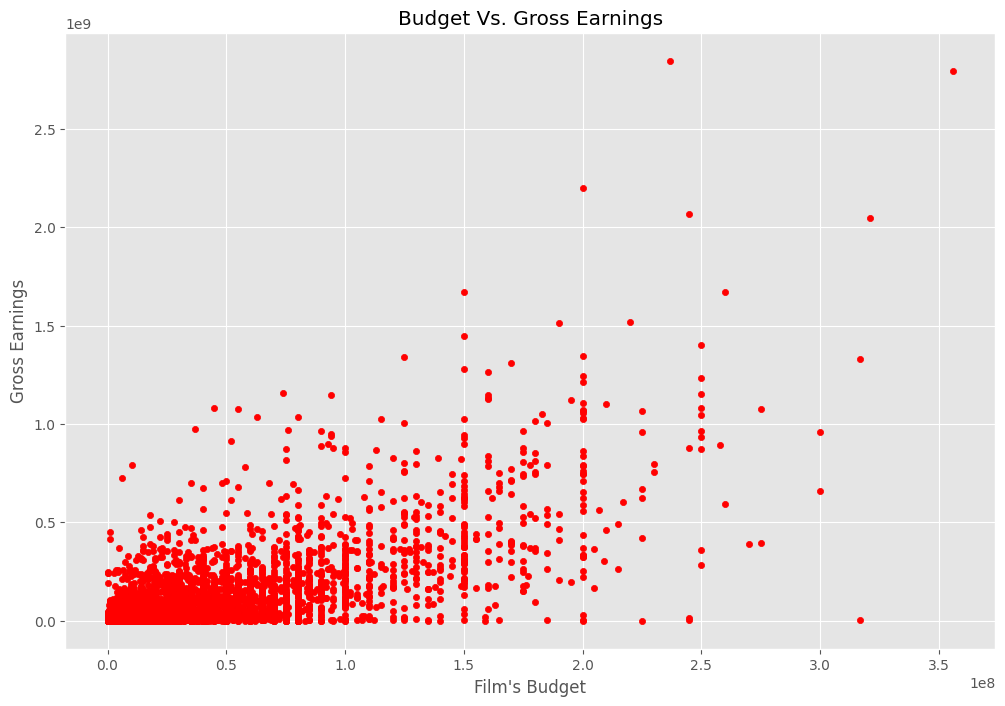

In [513]:
# Analysis No. 1

# Scatter plot with budget vs gross using matplotlib

df1.plot.scatter(x = 'budget' , y = 'gross' , color = 'r')
plt.title('Budget Vs. Gross Earnings')
plt.xlabel("Film's Budget")
plt.ylabel('Gross Earnings')
plt.show()

**ANALYSIS NO. 2**

 This analysis showcases the relationship between a movie's budget and its gross earnings. The scatter points represent individual movies, while the blue line indicates the trend. Hence, from the graph below, I can conclude from the line sloping upward that as the budget increases, so does the gross earnings increase, and the more the budget, there are more chances of movies being a success.

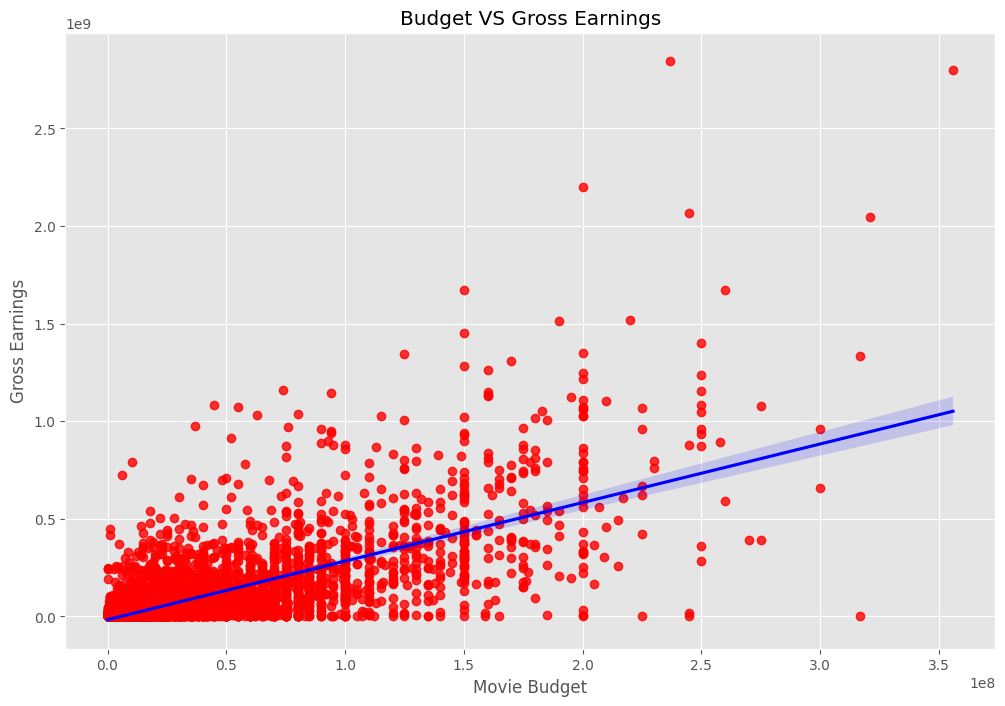

In [514]:
# Plot budget vs gross using seaborn
sns.regplot(x = 'budget' , y = 'gross', data = df1, scatter_kws={'color':'red'} , line_kws={'color':'blue'})
plt.title('Budget VS Gross Earnings')
plt.xlabel('Movie Budget')
plt.ylabel('Gross Earnings')

plt.show()

**ANALYSIS NO. 3**

This regression plot illustrates the potential relationship between a movie's budget and its score. The red dots showcase individual movies, while the blue line represents the regression line. The positive slope of the blue line indicates that higher budgets correspond to higher movie scores, which suggests a potential influence of budget on the movie's overall rating.


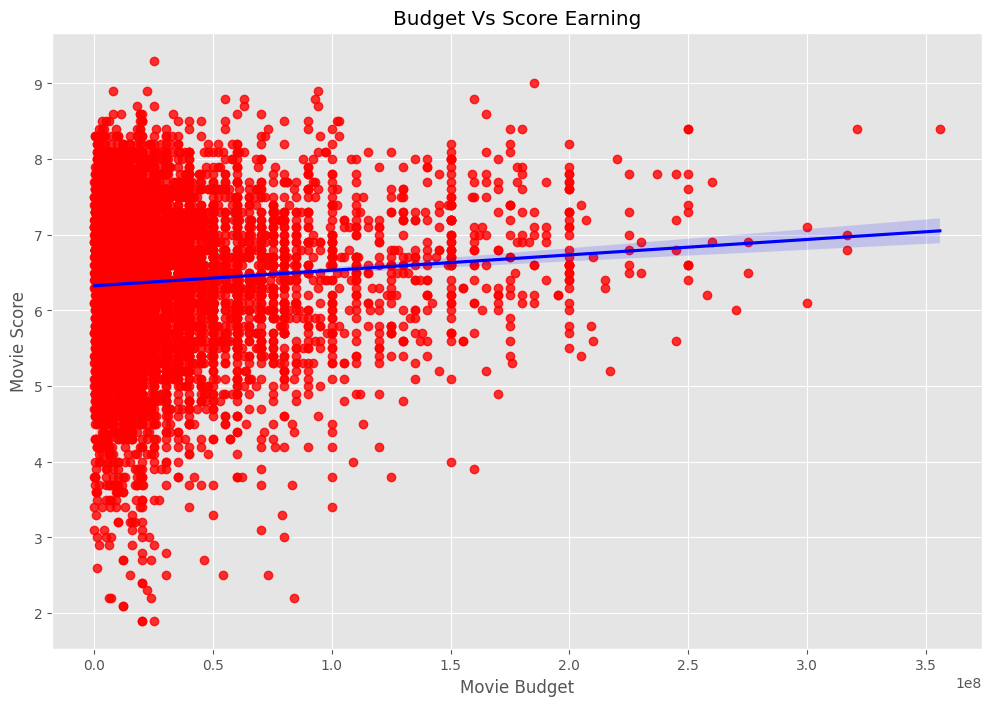

In [515]:
# Regression plot budget Vs score using seaborn to check if budget affect the score of the movie

sns.regplot(x = 'budget' , y = 'score', data = df1, scatter_kws={'color':'red'} , line_kws={'color':'blue'})
plt.title('Budget Vs Score Earning')
plt.xlabel('Movie Budget')
plt.ylabel('Movie Score')
plt.show()

**ANALYSIS NO. 4**

The scatter plot illustrates the relationship between movie scores and gross earnings. The point moving upward from left to right implies that movies with higher scores tend to have higher gross earnings.
This plot visualizes the potential correlation between a movie's score and its financial success at the box office.

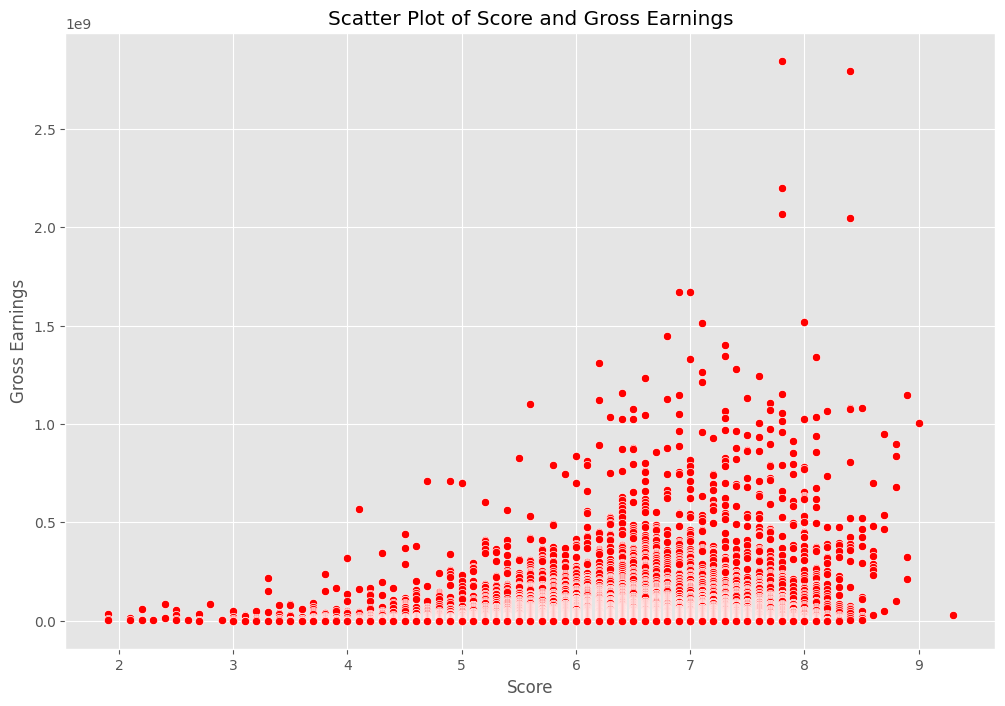

In [516]:
# Scatter Plot of Score and Gross Earnings

sns.scatterplot(data=df1, x="score", y="gross", color='r')
plt.xlabel("Score")
plt.ylabel("Gross Earnings")
plt.title("Scatter Plot of Score and Gross Earnings")
plt.show()

###**5. VISUALIZATION**

**ANALYSIS NO. 5**

This graph illustrates how frequently different ratings occur in the dataset, giving its distribution among different ratings. And so, from this graph, I can conclude that the R-rated movies are the highest in count with TV-14 and Approved being the least ones.

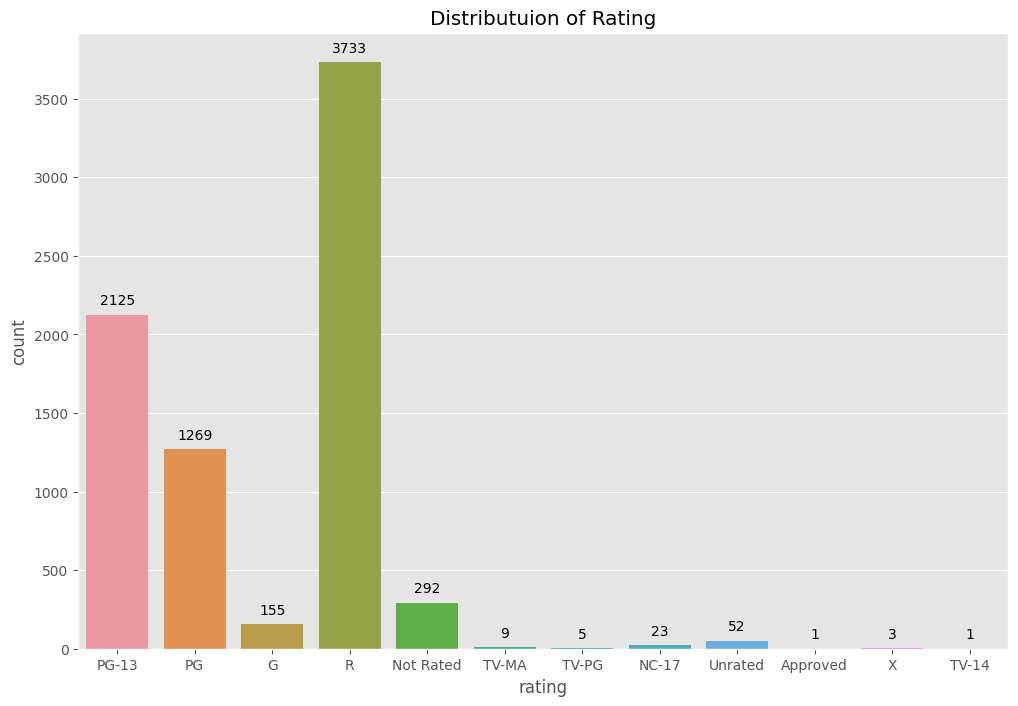

In [518]:
# Distribution of Ratings

rate = sns.countplot(x = 'rating', data = df1)
plt.title('Distributuion of Rating')

# Adding annotations
for p in rate.patches:
    rate.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

**ANALYSIS NO. 6**

 This histogram depicts the distribution of movie runtimes, showcasing how frequently certain durations occur within the dataset. Each bar represents a range of movie lengths, while the y-axis illustrates the count of movies falling into these specific runtime categories from which I concluded that most of the movies are in the ballpark of 100 minutes runtime and to be precise with the frequency of 2479.

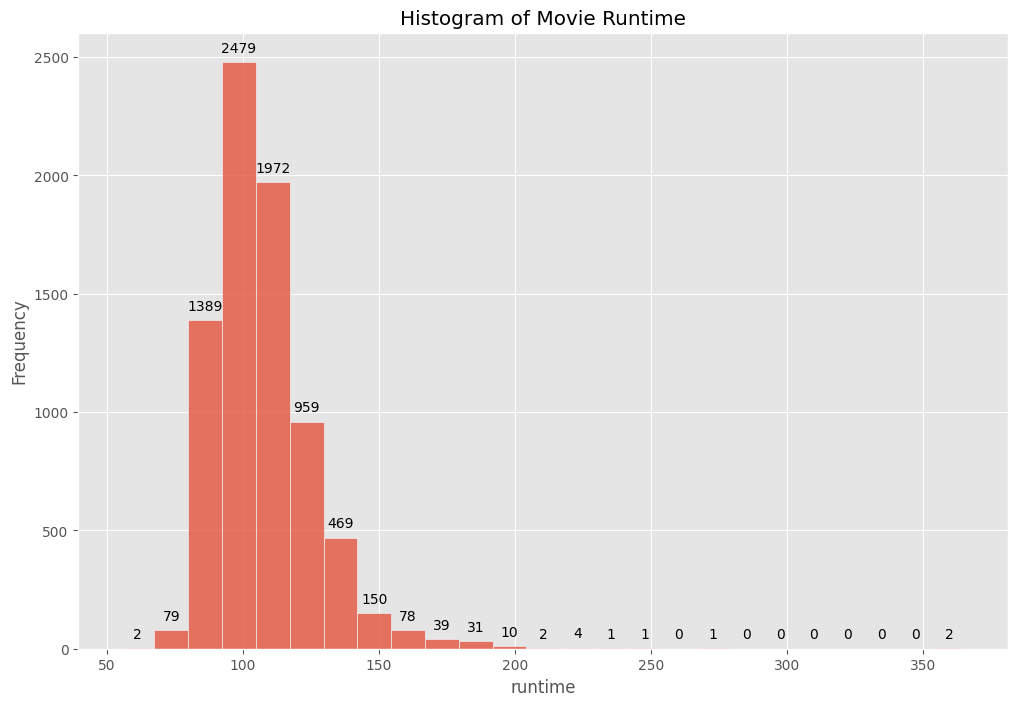

In [519]:
# Histogram of Movie Runtime with Annotations

runt = sns.histplot(x = 'runtime', data = df1, bins = 25)
plt.ylabel('Frequency')
plt.title('Histogram of Movie Runtime')

# Adding annotations
for p in runt.patches:
    runt.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

**ANALYSIS NO. 7**

This bar graph visualizes the number of movies produced in different countries, where the x-axis denotes the countries, while the y-axis signifies the count of movies produced, assisting in the comparison of movie production levels among different nations. The graph below indicates that the highest no. of movies are released in the US.

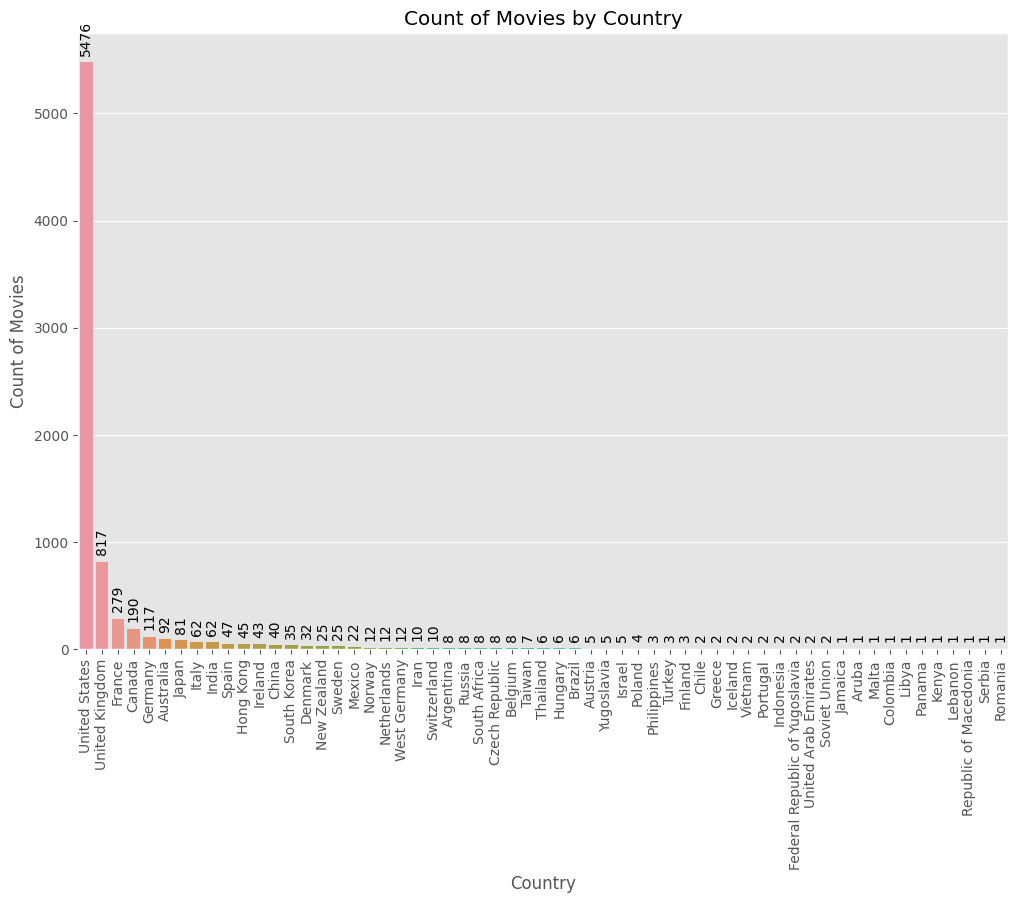

In [520]:
# Count of Movies by Country with Annotations

country = sns.countplot(data=df1, x = 'country', order=df1['country'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Count of Movies')
plt.title('Count of Movies by Country')

# Adding annotations
for p in country.patches:
    country.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points', rotation='vertical')
plt.show()

**ANALYSIS NO. 8**

The x-axis represents different countries, while the y-axis showcases the average gross earnings. The visualization aids in understanding the variation in average gross earnings across different countries involved in movie production. From the graph below I can conclude that Malta has the maximum gross earnings with a ballpark around 3.5.

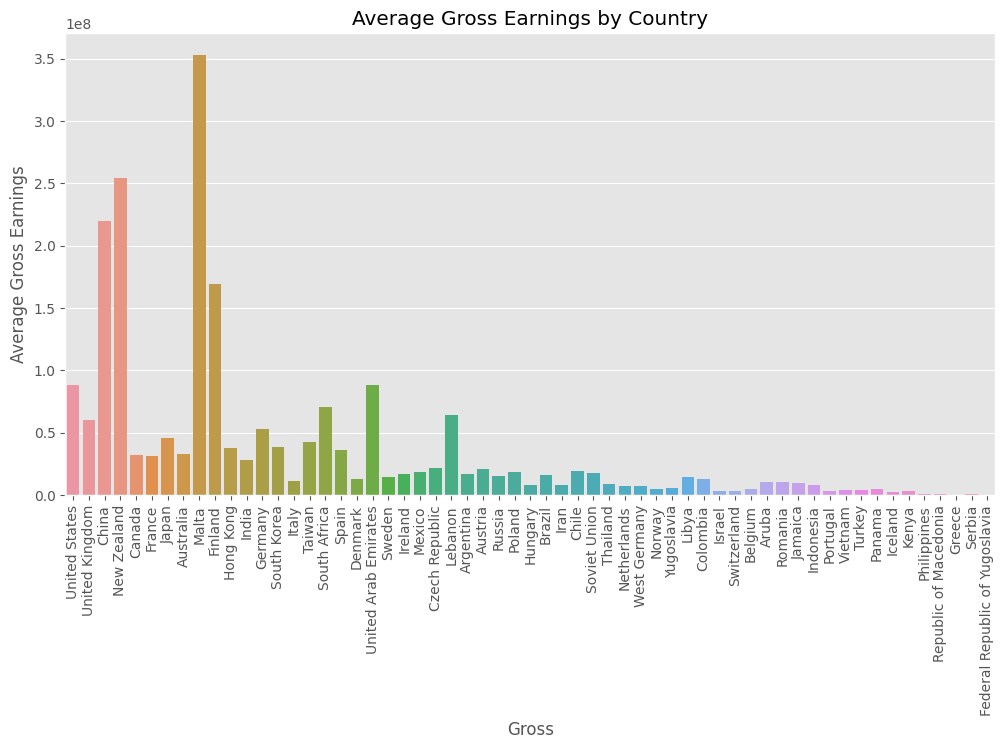

In [521]:
# Barplot of Average Gross Earnings by Country

plt.figure(figsize=(12, 6))
sns.barplot(data = df1, x = 'country', y='gross', errorbar= None, estimator=np.mean)
plt.xticks(rotation=90)
plt.xlabel('Gross')
plt.ylabel('Average Gross Earnings')
plt.title('Average Gross Earnings by Country')

plt.show()

**ANALYSIS NO. 9**

The below visual representation helps in comprehending the variation and pattern of gross earnings across the years presented in the dataset. The plot's trendline helps in identifying any consistent inclines, declines, or fluctuations in earnings over time as we can observe from the trend that there is a gradual increase since the year 1980's and a sudden steep decline in the year 2020.

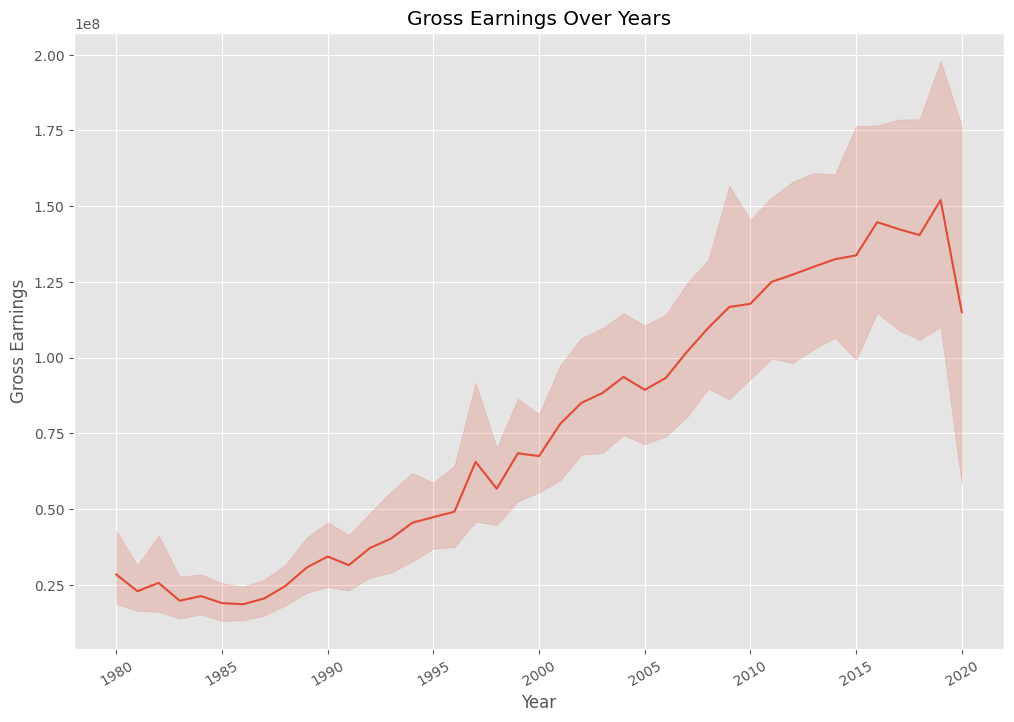

In [522]:
# Line Plot of Gross Earnings Over Years

sns.lineplot(data=df1, x='year', y='gross')
plt.xlabel('Year')
plt.ylabel('Gross Earnings')
plt.title('Gross Earnings Over Years')
plt.xticks(rotation=30)
plt.show()

**ANALYSIS NO. 10**

This graph gives us information about the fluctuations in the average film budget over the years. From the graph below I came to the conclusion that the financial budget for the movies increases gradually overtime with some variations and peaking in the year 2016.

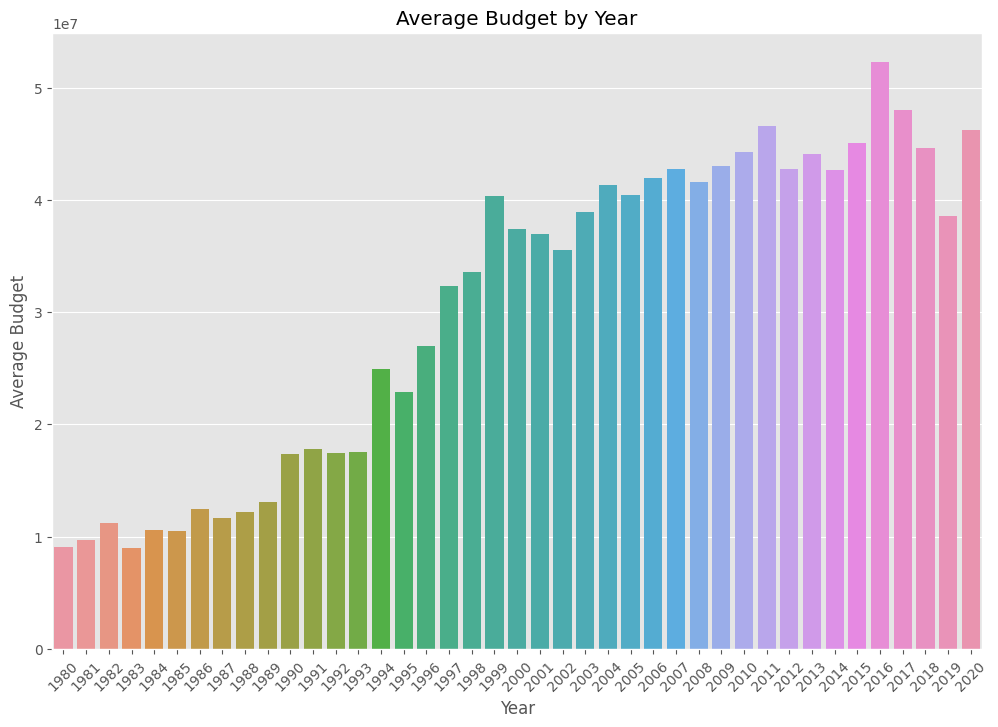

In [523]:
# Barplot of Budget by Year

sns.barplot(data=df1, x='year', y='budget', errorbar=None, estimator=np.mean)
plt.xlabel('Year')
plt.ylabel('Average Budget')
plt.title('Average Budget by Year')
plt.xticks(rotation=45)
plt.show()

 **ANALYSIS NO. 11**

 Each genre category is represented by bars segmented by different types of ratings within each genre. This visualization allows for a comprehensive comparison of how different ratings are distributed across various movie genres. The comedy genre contains the most movies and co-shares most categories in a single genre with drama.

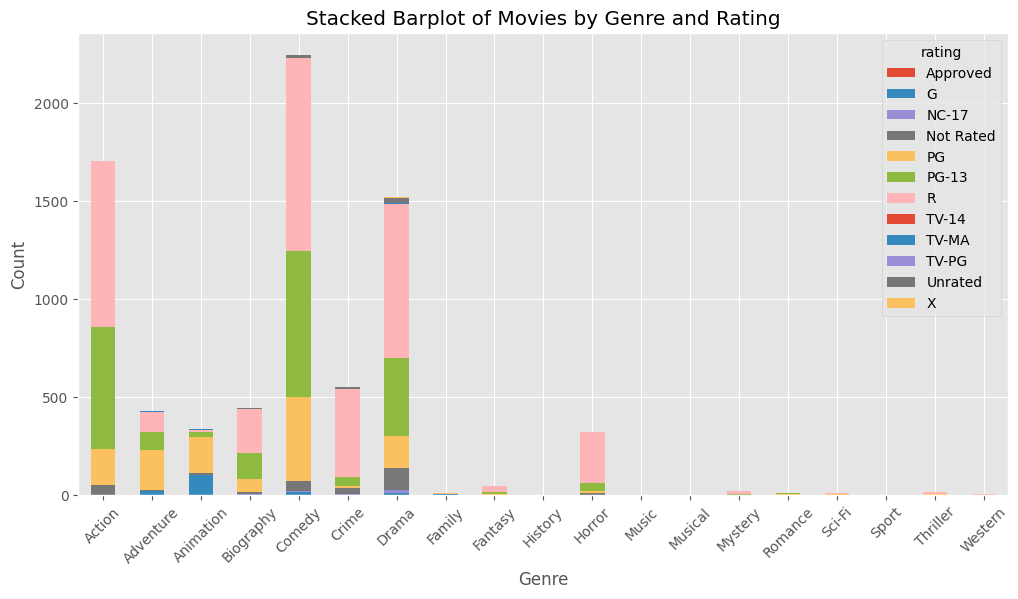

In [524]:
# Stacked Barplot of Movies by Genre and Rating

genre_rtcounts= df1.groupby(['genre', 'rating']).size().unstack()
genre_rtcounts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Stacked Barplot of Movies by Genre and Rating')
plt.xticks(rotation=45)
plt.show()

**ANALYSIS NO. 12**

This analysis represents a director, showcasing the number of movies they've directed which highlights the productive nature of these directors within the dataset, providing insights into the most frequently appearing directors and their contribution to the movie count. From the graph below, I can conclude that Woody Allen has directed a maximum no. of movies and to be precise he has directed 38 movies which I can check with the help of Annotations on top of each bar to display the exact count for better clarity.

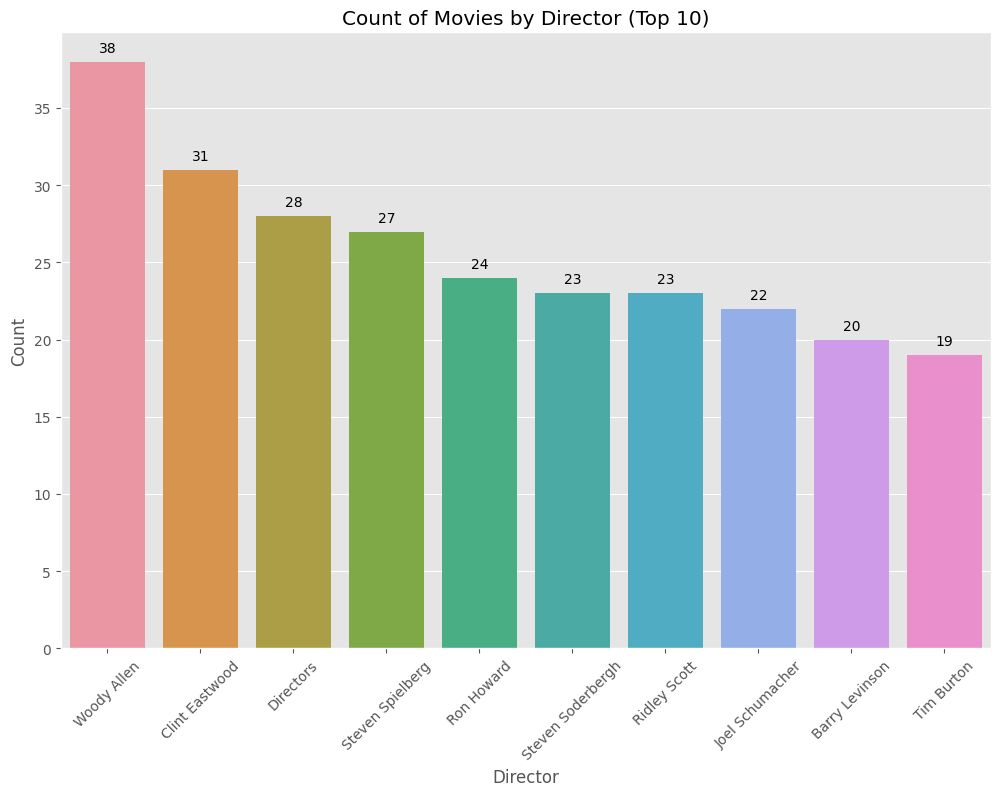

In [525]:
# Count of Movies by Director

director_counts=df1['director'].value_counts().head(10)
dir_counts= sns.barplot(x=director_counts.index, y=director_counts.values)
plt.xlabel('Director')
plt.ylabel('Count')
plt.title('Count of Movies by Director (Top 10)')
plt.xticks(rotation=45)

# Adding annotations
for p in dir_counts.patches:
    dir_counts.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

In [526]:
df1.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162
1,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181
2,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194
3,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138
4,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149


In [527]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7668 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7668 non-null   object 
 5   score     7668 non-null   float64
 6   votes     7668 non-null   int64  
 7   director  7668 non-null   object 
 8   writer    7668 non-null   object 
 9   star      7668 non-null   object 
 10  country   7668 non-null   object 
 11  budget    7668 non-null   int64  
 12  gross     7668 non-null   int64  
 13  company   7668 non-null   object 
 14  runtime   7668 non-null   int64  
dtypes: float64(1), int64(5), object(9)
memory usage: 898.7+ KB


**CONCLUSION:**

The exploration of this movie dataset revealed multi-dimensional insights. From the correlation analysis, it's evident that a movie's budget significantly influences its gross earnings. The scatter plots and regression analyses showcased these correlations vividly, indicating that higher budgets often correlate with higher earnings and scores. Moreover, the visualization of movie ratings, genres, and their distributions allowed for a deeper understanding of the dataset's composition. From examining runtime frequencies to exploring directors' prolificacy, each analysis brought unique perspectives. This comprehensive analysis serves as a valuable resource for understanding the film industry's intricate dynamics, paving the way for further research and informed decision-making.

**References:**

1. https://www.kaggle.com/datasets/danielgrijalvas/movies
2. https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.123rf.com%2Fphoto_23262031_abstract-cinema-symbols-with-shadow-effect-on-white-background.html&psig=AOvVaw3Ith8UeOwUv5VE_y4zE62w&ust=1702731227626000&source=images&cd=vfe&opi=89978449&ved=0CBIQjRxqFwoTCIjpsr--kYMDFQAAAAAdAAAAABAH

